#8.1 MNIST 데이터 베이스

In [1]:
#-- 리스트 8-1-(1)
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


6만개의 훈련용 데이터와 만개의 테스트용 데이터

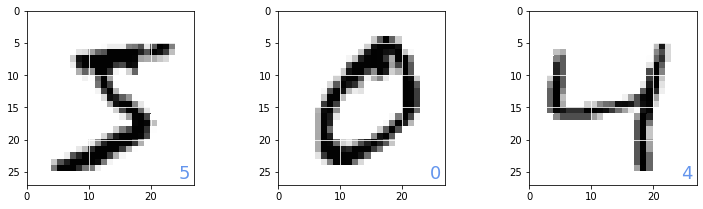

In [2]:
# - 리스트 8-1-(2)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % y_train[id], color='cornflowerblue', fontsize=18) #정답 label
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color='white')
plt.show()

#8.2 2층 피드 포워드 네트워크 모델

28*28의 이미지를 784 길이의 벡터로 변환

np_utils.to_categorical로 원핫 인코딩

16개의 히든레이어와 10개의 출력층 

In [3]:
#-- 리스트 8-1-(3)
from keras.utils import np_utils


x_train = x_train.reshape(60000, 784) # (A)
x_train = x_train.astype('float32') # (B)
x_train = x_train / 255 # (C)
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes) # (D)


x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

In [4]:
#-- 리스트 8-1-(4)
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


model = Sequential() # (A)
model.add(Dense(16, input_dim=784, activation='sigmoid')) # (B)
model.add(Dense(10, activation='softmax')) # (C)
model.compile(loss='categorical_crossentropy',
optimizer=Adam(), metrics=['accuracy']) # (D)

In [5]:
#-- 리스트 8-1-(5)
import time


startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test)) # (A)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 4s 7ms/step - loss: 2.0123 - accuracy: 0.4218 - val_loss: 1.7348 - val_accuracy: 0.6502
Epoch 2/10
60/60 [==============================] - 0s 5ms/step - loss: 1.5567 - accuracy: 0.7214 - val_loss: 1.3848 - val_accuracy: 0.7785
Epoch 3/10
60/60 [==============================] - 0s 4ms/step - loss: 1.2627 - accuracy: 0.7998 - val_loss: 1.1338 - val_accuracy: 0.8318
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 1.0453 - accuracy: 0.8353 - val_loss: 0.9459 - val_accuracy: 0.8533
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.8831 - accuracy: 0.8554 - val_loss: 0.8066 - val_accuracy: 0.8697
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.7628 - accuracy: 0.8673 - val_loss: 0.7041 - val_accuracy: 0.8779
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 0.6734 - accuracy: 0.8757 - val_loss: 0.6271 - val_accuracy: 0.8855
Epoch 8/10
60/60 [==

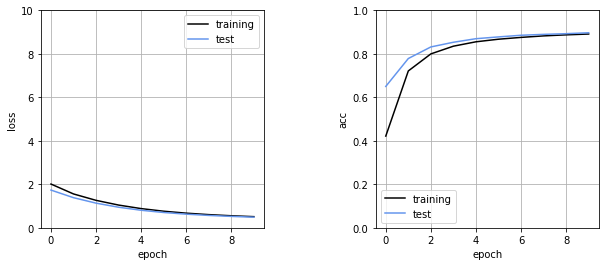

In [6]:
#-- 리스트 8-1-(6)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test',
         color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'],label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

313/313 [==============================] - 0s 1ms/step


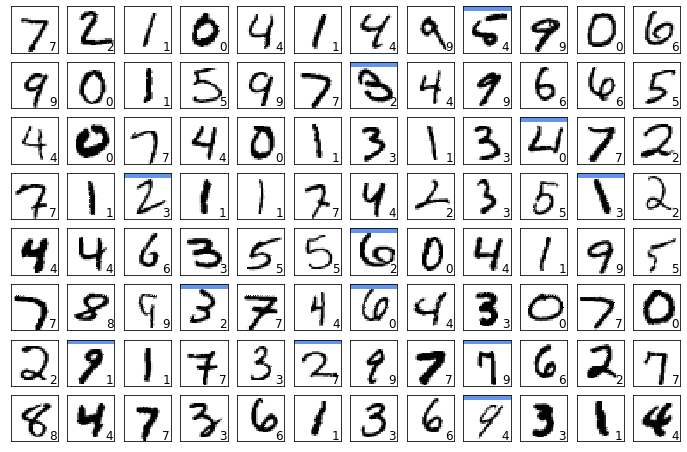

In [7]:
#-- 리스트 8-1-(7)
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
#-- 메인
show_prediction()
plt.show()

파란색 줄은 오답일 경우를 나타냄

#9.3 ReLU 활성화 함수

In [8]:
#-- 리스트 8-1-(8)
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu')) # (A)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(), metrics=['accuracy'])


startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=10,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 7ms/step - loss: 1.4950 - accuracy: 0.5864 - val_loss: 0.8456 - val_accuracy: 0.8198
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 0.6556 - accuracy: 0.8434 - val_loss: 0.4911 - val_accuracy: 0.8782
Epoch 3/10
60/60 [==============================] - 0s 4ms/step - loss: 0.4506 - accuracy: 0.8816 - val_loss: 0.3822 - val_accuracy: 0.8990
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3763 - accuracy: 0.8977 - val_loss: 0.3353 - val_accuracy: 0.9083
Epoch 5/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3373 - accuracy: 0.9064 - val_loss: 0.3093 - val_accuracy: 0.9147
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3124 - accuracy: 0.9132 - val_loss: 0.2901 - val_accuracy: 0.9198
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 0.2945 - accuracy: 0.9180 - val_loss: 0.2754 - val_accuracy: 0.9243
Epoch 8/10
60/60 [==

sigmoid를 사용했을 때 보다 약 3% 정확도가 올랐다.

313/313 [==============================] - 1s 2ms/step


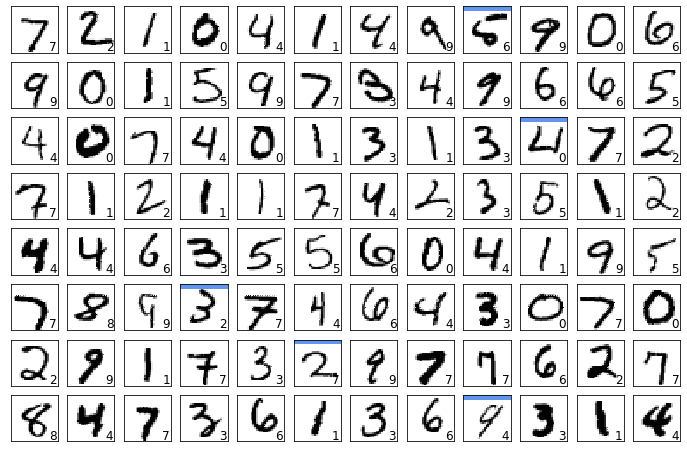

In [9]:
# 리스트 8-1-(9)
show_prediction()
plt.show()

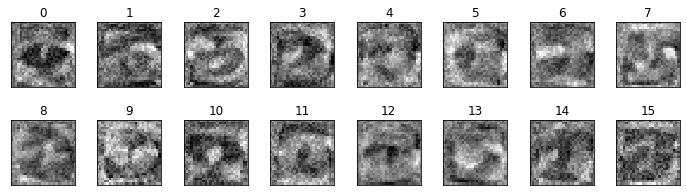

In [10]:
#-- 리스트 8-1-(10)
# 1층째의 무게 시각화
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i + 1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()

가중치 값이 양수이면 검은색, 음수이면 흰색으로 표시

희미하게 숫자의 형태를 띈다.

#8.4 공간 필터

필터는 2차원 행렬로 표현

In [11]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? ㅛ
Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [12]:
#-- 리스트 8-2-(1)
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

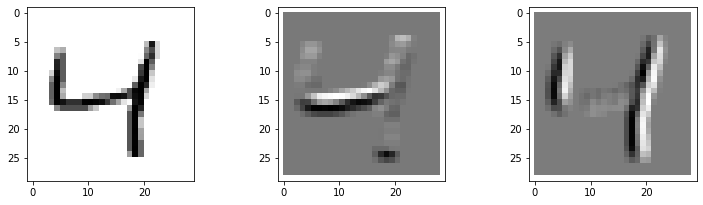

In [13]:
#-- 리스트 8-2-(2)
import matplotlib.pyplot as plt
%matplotlib inline


id_img = 2
myfil1 = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [-2, -2, -2]], dtype=float) # (A)
myfil2 = np.array([[-2, 1, 1],
                   [-2, 1, 1],
                   [-2, 1, 1]], dtype=float) # (B)


x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

# 필터 처리
for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        out_img1[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil2.reshape(-1)) 


# - 표시
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

필터의 수치를 바꾸는 것은 대각선 엣지 강조, 이미지 스무딩, 세부 부분의 강조 등 다양한 처리가 가능하다.

필터를 처리했을 때 이미지가 작아지는 것을 방지하기 위한 방법으로 패딩 사용.

#8.5 합성곱 신경망

CNN은 필터 그 자체를 학습

In [14]:
#-- 리스트 8-2-(3)
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D # CNN을 사용
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import time


model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu')) # (3, 3)의 필터를 8개 사용
model.add(Flatten()) # (B)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 7s 17ms/step - loss: 0.7679 - accuracy: 0.8012 - val_loss: 0.3394 - val_accuracy: 0.9051
Epoch 2/20
60/60 [==============================] - 0s 8ms/step - loss: 0.3119 - accuracy: 0.9104 - val_loss: 0.2648 - val_accuracy: 0.9248
Epoch 3/20
60/60 [==============================] - 1s 12ms/step - loss: 0.2522 - accuracy: 0.9280 - val_loss: 0.2213 - val_accuracy: 0.9375
Epoch 4/20
60/60 [==============================] - 1s 10ms/step - loss: 0.2144 - accuracy: 0.9389 - val_loss: 0.1962 - val_accuracy: 0.9444
Epoch 5/20
60/60 [==============================] - 1s 9ms/step - loss: 0.1853 - accuracy: 0.9478 - val_loss: 0.1720 - val_accuracy: 0.9523
Epoch 6/20
60/60 [==============================] - 0s 7ms/step - loss: 0.1634 - accuracy: 0.9544 - val_loss: 0.1546 - val_accuracy: 0.9559
Epoch 7/20
60/60 [==============================] - 0s 8ms/step - loss: 0.1487 - accuracy: 0.9581 - val_loss: 0.1457 - val_accuracy: 0.9594
Epoch 8/20
60/60 

이전에 사용한 것들과 비교했을 때 성능이 좋다

padding='same'은 출력 크기가 변하지 않도록 패딩을 추가



In [15]:
#-- 리스트 8-1-(7)
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

313/313 [==============================] - 1s 2ms/step


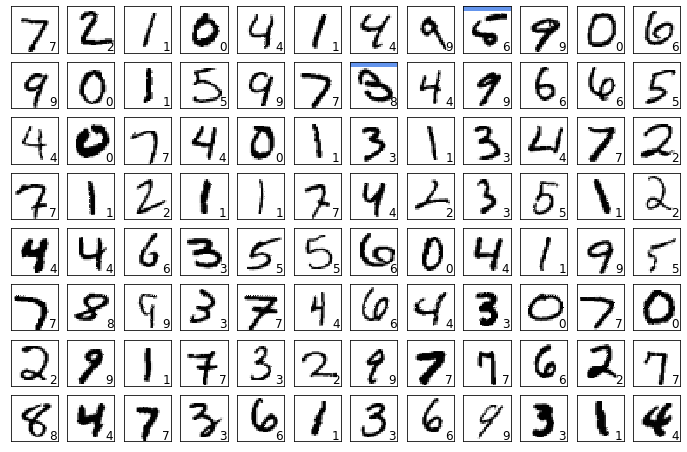

In [16]:
# 리스트 8-2-(4)
show_prediction()
plt.show()

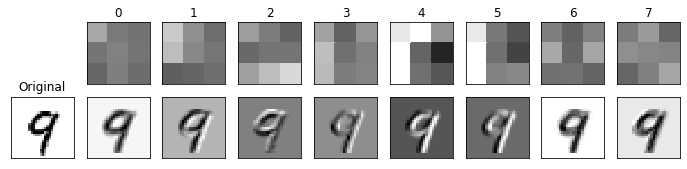

In [17]:
# 리스트 8-2-(5)
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")


w = model.layers[0].get_weights()[0] # (A)
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)
    # 필터 처리
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih + 3, iw:iw + 3]
            out_img[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

#8.6 풀링

이미지 인식과 중요한 것으로 이미지 위치의 어긋남에 대한 견고성이 있다

1픽셀만 어긋난 이미지를 입력해도 배열의 수치는 완전히 달라진다 

이를 해결하기 위한 방법으로 풀링이 있다

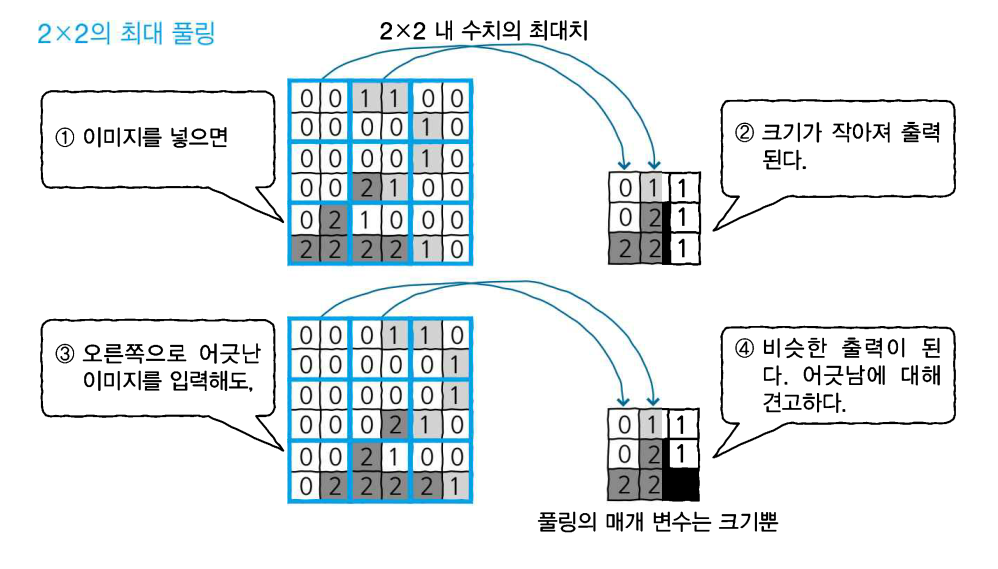

#8.7 드롭아웃

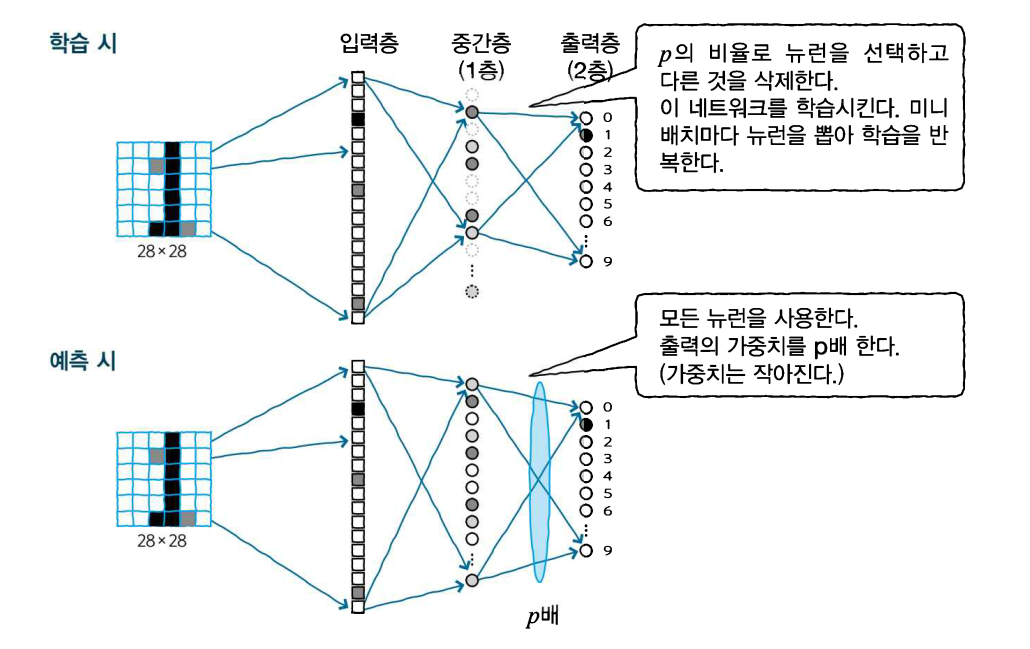

#8.8 MNIST인식 네트워크 모델



In [18]:
# 리스트 8-2-(6)
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import time


model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (A)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (B)
model.add(Dropout(0.25)) # (C)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) # (D)
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


startTime = time.time()


history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 3s 34ms/step - loss: 0.6854 - accuracy: 0.7951 - val_loss: 0.1277 - val_accuracy: 0.9616
Epoch 2/20
60/60 [==============================] - 2s 30ms/step - loss: 0.1359 - accuracy: 0.9587 - val_loss: 0.0662 - val_accuracy: 0.9779
Epoch 3/20
60/60 [==============================] - 2s 29ms/step - loss: 0.0876 - accuracy: 0.9742 - val_loss: 0.0451 - val_accuracy: 0.9855
Epoch 4/20
60/60 [==============================] - 2s 30ms/step - loss: 0.0678 - accuracy: 0.9800 - val_loss: 0.0408 - val_accuracy: 0.9865
Epoch 5/20
60/60 [==============================] - 2s 30ms/step - loss: 0.0590 - accuracy: 0.9821 - val_loss: 0.0328 - val_accuracy: 0.9892
Epoch 6/20
60/60 [==============================] - 2s 30ms/step - loss: 0.0487 - accuracy: 0.9857 - val_loss: 0.0299 - val_accuracy: 0.9895
Epoch 7/20
60/60 [==============================] - 2s 30ms/step - loss: 0.0435 - accuracy: 0.9862 - val_loss: 0.0269 - val_accuracy: 0.9909
Epoch 8/20
60

313/313 [==============================] - 1s 2ms/step


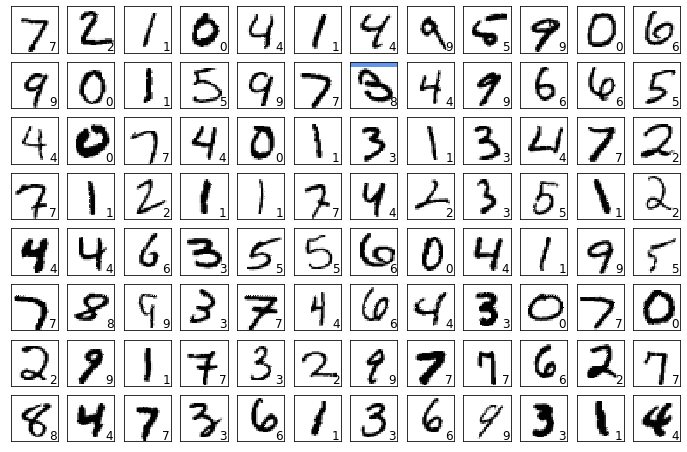

In [19]:
# 리스트 8-2-(7)
show_prediction()
plt.show()

층을 더 쌓고 드롭아웃을 추가하니 거의 100%에 가까운 성능을 보인다